**<h1 align=center><font size = 5>Object Detection with Faster R-CNN</font></h1>**

<br>

<img src="https://www.techexplorist.com/wp-content/uploads/2021/12/NASAs-Eyes-on-Asteroids.jpg" alt="Techexplorist">

<small>Picture Source:<a href="https://www.techexplorist.com/wp-content/uploads/2021/12/NASAs-Eyes-on-Asteroids.jpg">Techexplorist</a>

<br>

<h3>Near-Earth Objects - NEO</h3>

<p>Near-Earth objects (NEOs) are asteroids or comets of sizes ranging from metres to tens of kilometres that orbit the Sun and whose orbits come close to that of Earth’s. Of the more than 600 000 known asteroids in our Solar System, more than 20 000 are NEOs. An example of a NEO is 25143 Itokawa, an object about 300 m in diameter that was visited by the Japanese spacecraft Hayabusa in 2005.</p>

<br>

<h3>About NEOs</h3>

<p>NEOs could potentially hit our planet and, depending on their size, produce considerable damage. While the chance of a large object hitting Earth is very small, it would produce a great deal of destruction. NEOs thus merit active detection and tracking efforts.</p>

The goal of SSA’s NEO Segment (SSA-NEO) is to:

<ul>
    <li>Become aware of the current and future position of NEOs relative to our planet.</li>
    <li>Estimate the likelihood of Earth impacts.</li>
    <li>Assess the consequences of any possible impact.</li>
    <li>Develop NEO deflection methods.</li>
</ul> 

<p>The NEO Segment observes NEOs, predicts their orbits, produces impact warnings when necessary and is involved in potential mitigation measures.</p>

<br>

<h3>Context</h3>

<p>There is an infinite number of objects in the outer space. Some of them are 
closer than we think. Even though we might think that a distance of 70,000 Km 
can not potentially harm us, but at an astronomical scale, this is a very small 
distance and can disrupt many natural phenomena. These objects/asteroids can 
thus prove to be harmful. Hence, it is wise to know what is surrounding us and 
what can harm us amongst those. Thus, this dataset compiles the list of <b>NASA</b> 
certified asteroids that are classified as the nearest earth object.<p>

<br>

<b>License</b>
    
CC0: Public Domain
    
<h3>Sources</h3>
<ul>
    <li><a href="https://api.nasa.gov/">NASA Open API</a></li>
    <li><a href="https://cneos.jpl.nasa.gov/ca/">NEO Earth Close Approaches</a></li>
    <li><a href="https://www.jpl.nasa.gov/news/twenty-years-of-tracking-near-earth-objects">NASA/JPL-Caltech</a></li>
    <li><a href="https://www.esa.int/Safety_Security/Near-Earth_Objects_-_NEO_Segment#:~:text=Near%2DEarth%20objects%20(NEOs),than%2020%20000%20are%20NEOs.">ESA Near-Earth Objects - NEO Segment</a></li>

<hr>

# Objective for this Notebook

Within the scope of this project, a classification model was builded whether NEOs are dangerous or not, through data obtained from NASA.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#library">Importing Libraries</a></li>
<li><a href="https://#data_preprocessing">Data Preprocessing</a></li>
<li><a href="https://#ann">Building Artificial Neural Network Model for Classification</a></li>

<br>
<p></p>
Estimated Time Needed: <strong>10 min</strong>
</div>

<hr>

<a id="library"></a>

<h2 align=center>Importing Libraries</h2>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
keras.__version__

'2.7.0'

In [ ]:
pd.__version__

'1.3.4'

In [ ]:
sns.__version__

'0.11.2'

<a id="data_preprocessing"></a>

<h2 align=center>Data Preprocessing</h2>

<p>Data preprocessing can refer to manipulation or dropping of data before it is used in order to ensure or enhance performance, and is an important step in the data mining process. The phrase "garbage in, garbage out" is particularly applicable to data mining and machine learning projects.</p>

### 2.1. Uploading data

In [ ]:
start = time.time()

In [ ]:
df = pd.read_csv('neo.csv')
HAZARDOUS=df['hazardous']

In [ ]:
df.head(10)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
5,54138696,(2021 GY23),0.036354,0.081291,34297.587778,4.058569e+07,Earth,False,24.32,False
6,54189957,(2021 PY40),0.171615,0.383743,27529.472307,2.906912e+07,Earth,False,20.95,False
7,54230078,(2021 XD6),0.005328,0.011914,57544.470083,5.511502e+07,Earth,False,28.49,False
8,2088213,88213 (2001 AF2),0.350393,0.783502,56625.210122,6.903598e+07,Earth,False,19.40,False
9,3766065,(2016 YM),0.105817,0.236614,48425.840329,3.835526e+07,Earth,False,22.00,False


In [ ]:
HAZARDOUS

0        False
1         True
2        False
3        False
4         True
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Name: hazardous, Length: 90836, dtype: bool

### 2.2. Removing unnecessary columns

<p>As we can see, there is only 1 unique value in <code>orbiting_body</code> and <code>sentry_object</code>. Because of that, we are dropping there columns. In addition, we don't need to use id and name parameters.</p>

In [ ]:
df['orbiting_body'].value_counts()

Earth    90836
Name: orbiting_body, dtype: int64

In [ ]:
df['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [ ]:
df.drop(['orbiting_body', 'sentry_object', 'id', 'name'], axis = 1, inplace = True)

### 2.3. Looking for anomalies and duplicated datas

<p>Dependent and independent variables, in other words, the data in the columns are checked for unspecified values.</p>

In [ ]:
df.isnull().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

Let's get first and last 10 rows.

In [ ]:
df.head(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
5,0.036354,0.081291,34297.587778,4.058569e+07,24.32,False
6,0.171615,0.383743,27529.472307,2.906912e+07,20.95,False
7,0.005328,0.011914,57544.470083,5.511502e+07,28.49,False
8,0.350393,0.783502,56625.210122,6.903598e+07,19.40,False
9,0.105817,0.236614,48425.840329,3.835526e+07,22.00,False


In [ ]:
df.tail(10)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
90826,0.086807,0.194106,45322.795023,4.095345e+07,22.43,False
90827,0.024692,0.055213,14655.044804,1.766750e+07,25.16,False
90828,0.036691,0.082043,26172.119254,2.249368e+06,24.30,False
90829,0.123184,0.275448,80671.310009,6.897365e+07,21.67,False
90830,0.069913,0.156329,38102.469622,4.667988e+07,22.90,False
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False
90835,0.039862,0.089133,27024.455553,5.977213e+07,24.12,False


Now, let's get description of the data in the DataFrame.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,0.000609,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,0.001362,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,203.346433,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6745.532516,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


Check number of duplicated rows with <code>duplicated().sum()</code>.

In [ ]:
df.duplicated().sum()

7

Drop duplicated rows.

In [ ]:
dp = df[df.duplicated(keep=False)]
dp.head(2)
df.drop_duplicates(inplace= True)

Done!

In [ ]:
df.duplicated().sum()

0

Let's print a concise summary of our DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90829 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90829 non-null  float64
 1   est_diameter_max    90829 non-null  float64
 2   relative_velocity   90829 non-null  float64
 3   miss_distance       90829 non-null  float64
 4   absolute_magnitude  90829 non-null  float64
 5   hazardous           90829 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 4.2 MB


We can see number of unique values and it self in our independent variables with <code>.value_counts()</code>

In [ ]:
HAZARDOUS.value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

Find the unique elements of an array with <code>.unique()</code>

In [ ]:
HAZARDOUS.unique()

array([False,  True])

### 2.4. Plotting

<p>Plots were created in order to gain a different perspective on values and provide visuality.<p>

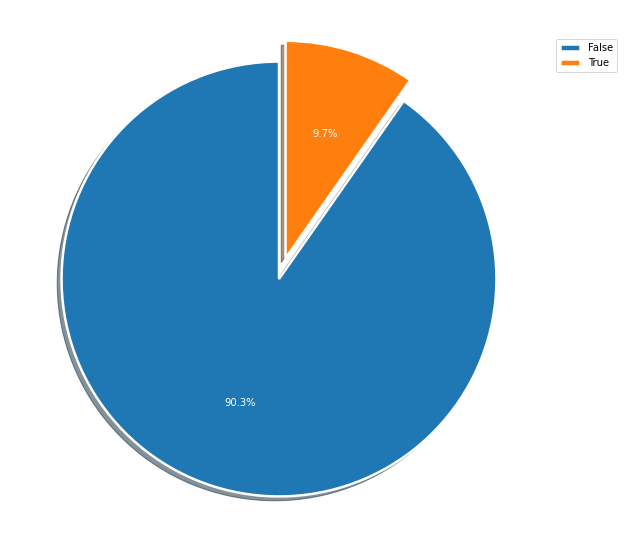

In [ ]:
explode = (0, 0.1)
fig = plt.figure(figsize = (10, 10), facecolor='w')
out_df=pd.DataFrame(df.groupby('hazardous')['hazardous'].count())

patches, texts, autotexts = plt.pie(out_df['hazardous'], autopct='%1.1f%%',
                                    textprops={'color': "w"},
                                    explode=explode,
                                    startangle=90, shadow=True)

for patch in patches:
    patch.set_path_effects({path_effects.Stroke(linewidth=2.5,
                                                foreground='w')})

plt.legend(labels=['False','True'], bbox_to_anchor=(1., .95))
# plt.savefig('gender_pie')
plt.show()

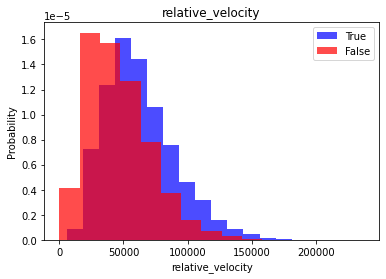

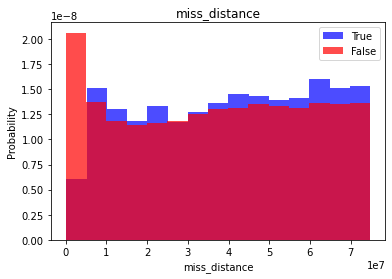

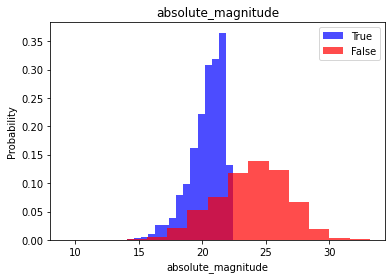

In [ ]:
for i in range(3):
  label = df.columns[i+2]
  plt.hist(df[df['hazardous']==1][label], color='blue', label="True", alpha=0.7, density=True, bins=15)
  plt.hist(df[df['hazardous']==0][label], color='red', label="False", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Creating correlation matrix heat map.

<AxesSubplot:>

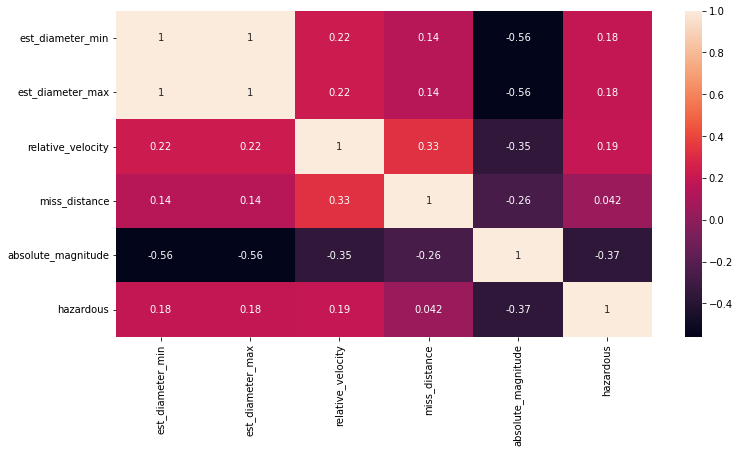

In [ ]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(),annot = True)

### 2.5. Label encoding

<p> Building Label Encoding to handle categorical variables (for hazardous/label column).</p>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df['hazardous'])
df['label'] = label_encoder.transform(df['hazardous'])
df['label'].unique()

array([0, 1], dtype=int64)

Let's see what we have done;

In [ ]:
df.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous,label
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True,1


We categorized the unique values in the hazardous column and transferred them to a different column named label.

### 2.6. Determination of dependent and independent variables

<p>To build model and make prediction, we need to seperate our data as dependent and independent variables.

In [ ]:
X = df.drop(["label", "hazardous"], axis = 1)
y = df["label"]

<b>Dependent variables</b>

In [ ]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09
...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80


<b>Independent variables</b>

In [ ]:
y

0        0
1        1
2        0
3        0
4        1
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: label, Length: 90829, dtype: int64

### 2.7. Splitting test and train

<p>The train-test split is a technique for evaluating the performance of a machine learning algorithm. Seperated %66.6 for train and %33.3 for test set.</p>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
x_train.shape

(60855, 5)

In [ ]:
y_train.shape

(60855,)

In [ ]:
x_test.shape

(29974, 5)

In [ ]:
y_test.shape

(29974,)

### 2.8. Scaling datas

<p>This means that you're transforming your data so that it fits within a specific scale like 0-1.</p>

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test) # Apply the trained

<a id="ann"></a>

<h2 align=center>Building Artificial Neural Network Model for Classification</h2>

<p>Artificial neural networks, usually simply called neural networks or, more simply yet, neural nets, are computing systems inspired by the biological neural networks that constitute animal brains. For more, please check <a href="https://en.wikipedia.org/wiki/Artificial_neural_network">Wikipedia</a>.</p>

We can directly import our model with keras function <code>load_model</code>.

### 3.1 Loading Created Model

In [ ]:
from keras.models import load_model
model = load_model('model.h5')

### 3.2 Checking the Architecture of the Model

In [ ]:
model.summary()

### 3.3. Define neural network parameters

<p>We have 5 dependent variables and we want 12 epochs in our model.</p>

In [ ]:
INPUT = X.shape[1]
EPOCHS = 12

### 3.4. Building neural networks with 2 hidden layers (1st(32 neurons) and 2nd(16 neurons)).

In [ ]:
model = Sequential()

# Creating first hidden layer:
model.add(Dense(32, activation="relu", input_dim=INPUT)) 

# Creating second hidden layer:
model.add(Dense(16, activation="relu"))  

# Creating output layer:
model.add(Dense(1, activation="sigmoid"))

### 3.5. Training

<p>Let's fit and train our model.</p>

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  
model_history = model.fit(X_train, y_train, epochs=EPOCHS)

Epoch 1/12
1902/1902 [==============================] - 5s 2ms/step - loss: 0.2078 - accuracy: 0.9063
Epoch 2/12
1902/1902 [==============================] - 4s 2ms/step - loss: 0.1874 - accuracy: 0.9116
Epoch 3/12
1902/1902 [==============================] - 3s 2ms/step - loss: 0.1859 - accuracy: 0.9117
Epoch 4/12
1902/1902 [==============================] - 4s 2ms/step - loss: 0.1850 - accuracy: 0.9119
Epoch 5/12
1902/1902 [==============================] - 3s 2ms/step - loss: 0.1846 - accuracy: 0.9120
Epoch 6/12
1902/1902 [==============================] - 4s 2ms/step - loss: 0.1841 - accuracy: 0.9124
Epoch 7/12
1902/1902 [==============================] - 4s 2ms/step - loss: 0.1837 - accuracy: 0.9125
Epoch 8/12
1902/1902 [==============================] - 4s 2ms/step - loss: 0.1836 - accuracy: 0.9125
Epoch 9/12
1902/1902 [==============================] - 4s 2ms/step - loss: 0.1833 - accuracy: 0.9126
Epoch 10/12
1902/1902 [==============================] - 4s 2ms/step - loss: 0.183

### 3.6. Show summary and save model

<p>Let's save our model for further predictions and see summary of our model.</p>

In [ ]:
print(model_history.history.keys())
model.summary()
model.save('model_jn.h5')

dict_keys(['loss', 'accuracy'])
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


### 3.7. Plot loss and accuracy

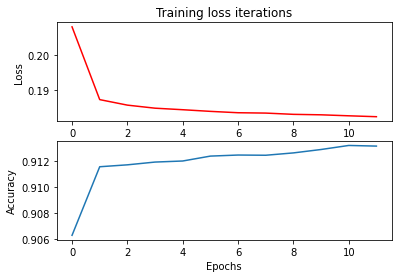

In [ ]:
def plot_accuracy_loss(training_results):
    plt.subplot(2, 1, 1)
    plt.plot(training_results.history['loss'], 'r')
    plt.ylabel('Loss')
    plt.title('Training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results.history['accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.show()
    
plot_accuracy_loss(model_history)

### 3.8. System success

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  #  Comparing results
print("\nConfusion Matrix:\n", cm)

from sklearn.metrics import accuracy_score
print(f"\nAccuracy score: {accuracy_score(y_test, y_pred)}")

end = time.time()
cal_time = end - start
print("\nBuilding model for NASA - Nearest Earth Objects data set took {} seconds.".format(cal_time))


Confusion Matrix:
 [[26844   224]
 [ 2427   479]]

Accuracy score: 0.9115566824581304

Building model for NASA - Nearest Earth Objects data set took 54.67812538146973 seconds.
